In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1-Regresyon Projesi Rastgele Orman

In [6]:
df= pd.read_csv("Desktop/Bootcamp/makine_ogrenmesi/regresyon_data.csv")
del df["Unnamed: 0"]
df.head()

,bmı,winsorize_life_expectancy,winsorize_schooling,winsorize_hepatitis_b,winsorize_gdp,log_percentage_expenditure,log_alcohol,sub_region_Australia and New Zealand,sub_region_Central Asia,sub_region_Eastern Asia,...,norm_winsorize_schooling,norm_winsorize_hepatitis_b,norm_winsorize_gdp,scale_bmı,scale_winsorize_life_expectancy,scale_log_percentage_expenditure,scale_log_alcohol,scale_winsorize_schooling,scale_winsorize_hepatitis_b,scale_winsorize_gdp
0,19.1,65.0,10.1,62.0,584.259210,4.280542,0.00995,0,0,0,...,0.015223,0.020333,0.000905,-0.975843,-0.404442,-0.429506,-1.519833,-0.915921,0.427211,-0.571539
1,18.6,62.0,10.0,62.0,612.696514,4.311116,0.00995,0,0,0,...,0.015072,0.020333,0.000949,-1.000792,-0.514258,-0.413983,-1.519833,-0.958393,0.427211,-0.568773
2,18.1,64.0,9.9,62.0,631.744976,4.307023,0.00995,0,0,0,...,0.014922,0.020333,0.000979,-1.025740,-0.441047,-0.416061,-1.519833,-1.000866,0.427211,-0.566920
3,17.6,67.0,9.8,62.0,669.959000,4.371777,0.00995,0,0,0,...,0.014771,0.020333,0.001038,-1.050689,-0.331231,-0.383183,-1.519833,-1.043338,0.427211,-0.563203
4,17.2,68.0,9.5,62.0,72.759313,2.091507,0.00995,0,0,0,...,0.014319,0.020333,0.000113,-1.070648,-0.294626,-1.540967,-1.519833,-1.170754,0.427211,-0.621295


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor

In [21]:
X= df.drop(["winsorize_life_expectancy", "norm_winsorize_life_expectancy", "scale_winsorize_life_expectancy"], axis=1)
y= df["winsorize_life_expectancy"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)


In [24]:
for i in range(5,20,3):
    rastgele_orman= RandomForestRegressor(n_estimators=i)     #en düşük skor n_estimator=14 için
    rastgele_orman.fit(X_train,y_train)
    y_tahmin= rastgele_orman.predict(X_test)
    rmse_test= MSE(y_test, y_tahmin)**(1/2)
    print("Karar Ağacı Sayısı {} için model skoru: {}".format(i, rmse_test))
    

Karar Ağacı Sayısı 5 için model skoru: 6.721960057514512
Karar Ağacı Sayısı 8 için model skoru: 6.633464541201574
Karar Ağacı Sayısı 11 için model skoru: 6.515539367952895
Karar Ağacı Sayısı 14 için model skoru: 6.342709480410705
Karar Ağacı Sayısı 17 için model skoru: 6.763883680244918


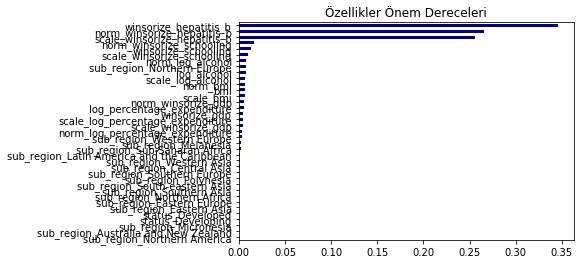

In [26]:
onem_dereceleri= pd.Series(data=rastgele_orman.feature_importances_, index=X_train.columns)
sirali_onem_dereceleri= onem_dereceleri.sort_values()
sirali_onem_dereceleri.plot(kind="barh", color="darkblue")
plt.title("Özellikler Önem Dereceleri")
plt.show()

# 2-Rastgele Orman İle Sınıflandırma

In [39]:
df= pd.read_csv("Desktop/Bootcamp/makine_ogrenmesi/siniflandirma_data.csv")
del df["Unnamed: 0"]
del df["customerID"]
df.head()

,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,Churn,Norm_TotalCharges,Norm_MonthlyCharges,Norm_Tenure,Scale_TotalCharges,Scale_MonthlyCharges,Scale_Tenure,Log_TotalCharges,Log_MonthlyCharges,Log_Tenure
0,1,29.85,29.85,1,0,0,1,1,0,1,...,0,0.000111,0.004983,0.000293,-0.994194,-1.161694,-1.280248,3.396185,3.396185,0.000000
1,34,56.95,1889.50,0,1,1,0,1,0,0,...,0,0.007004,0.009506,0.009971,-0.173740,-0.260878,0.064303,7.544068,4.042174,3.526361
2,2,53.85,108.15,0,1,1,0,1,0,0,...,1,0.000401,0.008989,0.000587,-0.959649,-0.363923,-1.239504,4.683519,3.986202,0.693147
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0.006823,0.007061,0.013197,-0.195248,-0.747850,0.512486,7.517928,3.744787,3.806662
4,2,70.70,151.65,1,0,1,0,1,0,0,...,1,0.000562,0.011801,0.000587,-0.940457,0.196178,-1.239504,5.021575,4.258446,0.693147


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [41]:
X=df.drop(["Churn"], axis=1)
y= df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111, test_size=0.2)

for i in range(5,20,3):
    rastgele_orman= RandomForestClassifier(n_estimators=i)
    rastgele_orman.fit(X_train, y_train)
    y_tahmin= rastgele_orman.predict(X_test)
    dogruluk= accuracy_score(y_test, y_tahmin)
    print("Kara Ağacı Sayısı {} için doğruluk değeri: {}".format(i, dogruluk))

Kara Ağacı Sayısı 5 için doğruluk değeri: 0.7633262260127932
Kara Ağacı Sayısı 8 için doğruluk değeri: 0.7654584221748401
Kara Ağacı Sayısı 11 için doğruluk değeri: 0.775408670931059
Kara Ağacı Sayısı 14 için doğruluk değeri: 0.7668798862828714
Kara Ağacı Sayısı 17 için doğruluk değeri: 0.7654584221748401


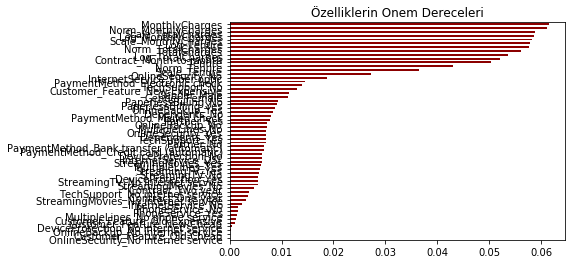

In [45]:
onem_dereceleri= pd.Series(data=rastgele_orman.feature_importances_, index=X_train.columns)
sirali_onem_dereceleri= onem_dereceleri.sort_values()
sirali_onem_dereceleri.plot(kind="barh", color="darkred")
plt.title("Özelliklerin Onem Dereceleri")
plt.show()